In [1]:
from instagram_interface import Instagram_I_ED
import matplotlib.pyplot as plt
import numpy as np
from itertools import compress

In [13]:
#Initialize the TikTok fetcher:

##Replace this with your token! 
##Get one for free at https://www.ensembledata.com/register
TOKEN = ""

ig = Instagram_I_ED(token_ED_API=TOKEN)

In [3]:
userid = "183250726"
res, success = ig.get_user_posts(userid, depth=4, oldest_timestamp=None)

if success:
    print("fetched the last",len(res["posts"]),"posts")
else:
    print("Something went wrong with the request: ", res.text)

fetched the last 40 posts


In [4]:
#Get the views counts from all the videos (in chronological order):
likes_count = [video["node"]["edge_media_preview_like"]["count"] for video in res["posts"]]
print(likes_count)

[802067, 202529, 813408, 1173862, 223697, 242918, 795030, 186161, 448109, 673298, 1772927, 1375704, 159100, 1740802, 185068, 1840114, 272717, 1216256, 1518432, 2292149, 2200091, 1810051, 918659, 384253, 2093497, 1074520, 925744, 1511878, 359752, 922192, 1579986, 523413, 574588, 1114150, 1025566, 1235224, 305080, 432121, 489631, 151696]


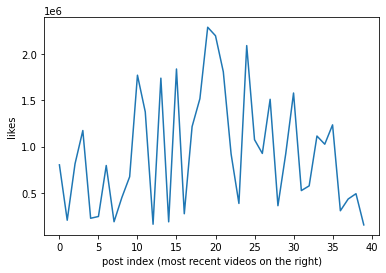

In [6]:
#Plotting it with matplotlib:

plt.plot(likes_count)
 
plt.xlabel('post index (most recent videos on the right)')
plt.ylabel('likes')

# function to show the plot
plt.show()

Overeall, the likes have increased by roughly 50%, but not constantly, as there has been an inflection roughly at two thirds, from which it is currently reovering.<br> Let us now calculate the engagement as the sum of likes and comments, divided by the followers:

In [8]:
#Getting these information is as straightforward as before:
comment_count = [video["node"]["edge_media_to_comment"]["count"] for video in res["posts"]]

#To get the number of followers we need to call another API, which uses the user_id:
user_id = res["posts"][0]["node"]["owner"]["id"]
followers, success = ig.get_user_followers(user_id)
n_followers = followers["count"]
print("number of followers:",n_followers)

number of followers: 48334702


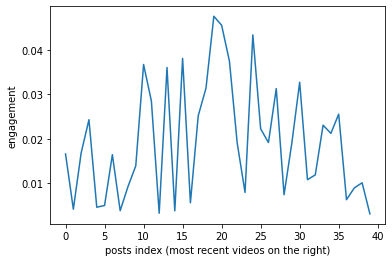

In [11]:
engagement = [(a+b)/n_followers for a,b in zip(likes_count, comment_count) ]

#Plotting it:

plt.plot(engagement)
 
plt.xlabel('posts index (most recent videos on the right)')
plt.ylabel('engagement')

# function to show the plot
plt.show()

The trend is similar as the one before, although it is important to note that this result is obtained using the current number of followers also for older posts. Hence, it is probable that older posts have in fact an higher engagement than the one shown in the graph. <br> Nonetheless, the overall engagement is quite high, as it gets closer to 10% followers engagement. 
<br> 
<br> 
The great thing about the fetched data is that it has all the (public) information avaiable.
For example, let's say we want to delve a little bit more into the user's post to understand its posting strategy. Does the user publishes a lot of videos (rather than pictures)? And does it get more views when it does ?

Out of 40  fetched posts, 13  of them are videos


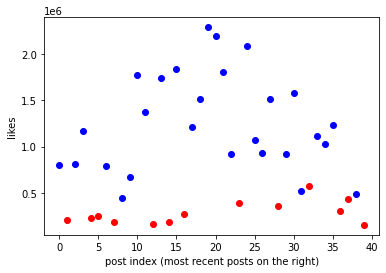

In [12]:
#Count how many posts have an hashtag
#This information can be either extracted from the raw video description, or from the field text_extra
videos = []

for post in res["posts"] : 
    is_video = False
    if post["node"]["__typename"] == "GraphVideo" : 
            is_video = True
    videos.append(is_video)
        
print("Out of",len(res["posts"])," fetched posts,", sum(videos)," of them are videos")

#Plot the videos views, with different color if with hashtag:
indexes = list(range(len(res["posts"])))
indexes_videos = list(compress(indexes, videos)) 
likes_videos = list(compress(likes_count, videos)) 

n_videos = [not h for h in videos]
indexes_n_videos = list(compress(indexes, n_videos)) 
likes_n_videos = list(compress(likes_count, n_videos)) 

plt.scatter(indexes_videos, likes_videos, color='red')
plt.scatter(indexes_n_videos, likes_n_videos,color='blue')

plt.xlabel('post index (most recent posts on the right)')
plt.ylabel('likes')
plt.show()

Interestingly, Charli d'Amelio, who became famous thanks to its TikTok videos, overall has a lower likes and engagement rate on video Instagram posts, compared to pictures. Furthermore, this trend seems to be consistent throught time